# 1. 인천공항 이용자에 대한 입국 외국인과 출국인의 추이 분석 시각화

In [1]:
import pandas as pd

In [2]:
# pwd

In [118]:
file_path = '/home/pkdata/data/출입국내외국인성별국제이동연간20250421.csv'
data = pd.read_csv(file_path, encoding="EUC-KR")
data.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2014,입국자,145019
1,인천공항,내국인,남자,2014,출국자,140468
2,인천공항,내국인,남자,2015,입국자,138858
3,인천공항,내국인,남자,2015,출국자,138947
4,인천공항,내국인,남자,2016,입국자,136025


In [4]:
data = data[['내외국인별','성별','시점','항목','데이터']]
data.head()

,내외국인별,성별,시점,항목,데이터
0,내국인,남자,2014,입국자,145019
1,내국인,남자,2014,출국자,140468
2,내국인,남자,2015,입국자,138858
3,내국인,남자,2015,출국자,138947
4,내국인,남자,2016,입국자,136025


In [5]:
foreign = data[data['내외국인별'] == '외국인']
foreign.head()

,내외국인별,성별,시점,항목,데이터
40,외국인,남자,2014,입국자,194067
41,외국인,남자,2014,출국자,115103
42,외국인,남자,2015,입국자,170986
43,외국인,남자,2015,출국자,130335
44,외국인,남자,2016,입국자,186190


In [6]:
foreign_in = foreign[foreign['항목'] == '입국자']
foreign_in.tail()

,내외국인별,성별,시점,항목,데이터
70,외국인,여자,2019,입국자,163755
72,외국인,여자,2020,입국자,111761
74,외국인,여자,2021,입국자,111261
76,외국인,여자,2022,입국자,172332
78,외국인,여자,2023,입국자,181388


In [7]:
foreign_in = foreign_in.groupby('시점')['데이터'].sum().reset_index(name='in')
foreign_in.head(3)

,시점,in
0,2014,349451
1,2015,314511
2,2016,339347


In [8]:
foreign_out = foreign[foreign['항목'] == '출국자']
foreign_out.head()

,내외국인별,성별,시점,항목,데이터
41,외국인,남자,2014,출국자,115103
43,외국인,남자,2015,출국자,130335
45,외국인,남자,2016,출국자,140489
47,외국인,남자,2017,출국자,151742
49,외국인,남자,2018,출국자,160929


In [9]:
foreign_out = foreign_out.groupby('시점')['데이터'].sum().reset_index(name = "out")
foreign_out.head(3)

,시점,out
0,2014,218859
1,2015,240312
2,2016,255491


<Axes: title={'center': '2014~2023년 외국인 출국자 현황'}, xlabel='년도', ylabel='인원수'>

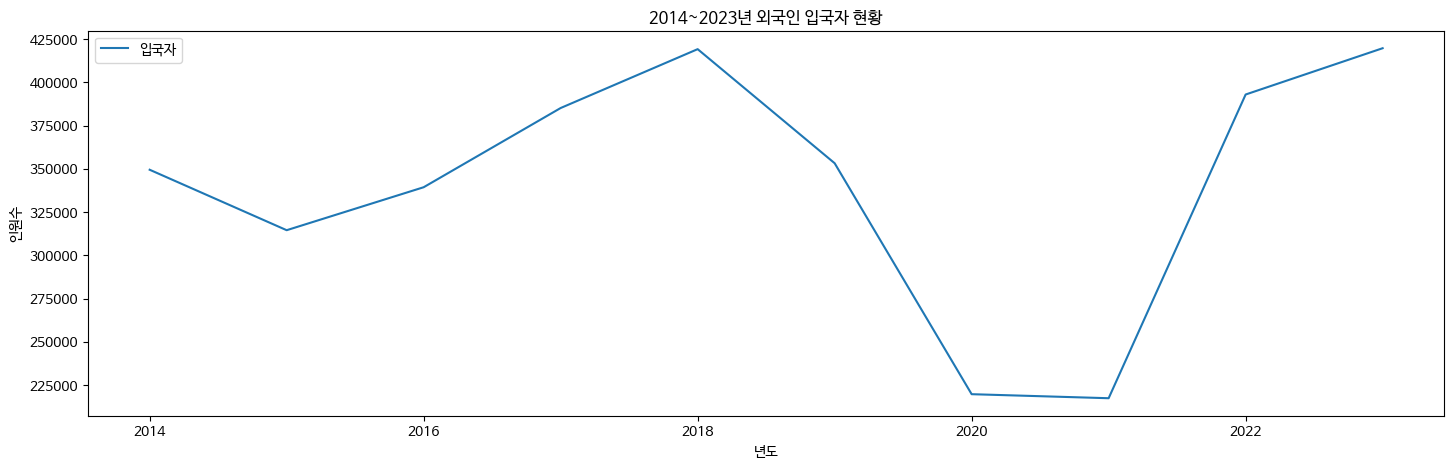

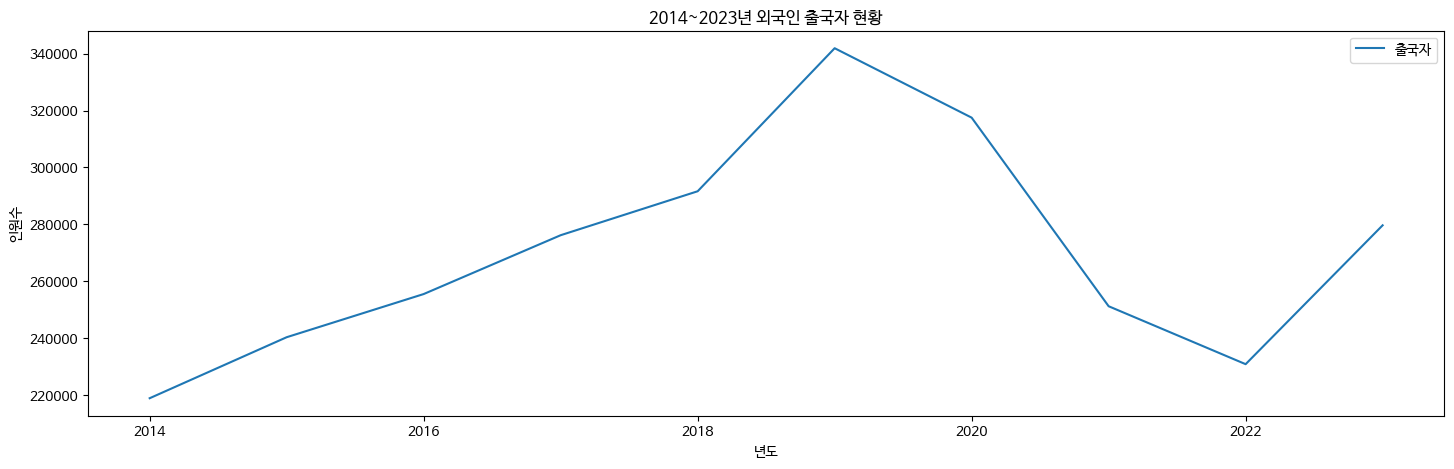

In [95]:
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font',family="NanumBarunGothic")
foreign_in.plot(x = '시점', y='in', label = '입국자', figsize = (17.5,5), title = "2014~2023년 외국인 입국자 현황", xlabel = '년도', ylabel = '인원수')
foreign_out.plot(x = '시점', y='out', label = '출국자',figsize = (17.5,5), title = "2014~2023년 외국인 출국자 현황", xlabel = '년도', ylabel = '인원수')

In [11]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [110]:
from prophet import Prophet

foreign_in['시점'] = pd.to_datetime(foreign_in['시점'], format ="%Y")
in_data = foreign_in.rename(columns={'시점':'ds','in':'y'})

foreign_out['시점'] = pd.to_datetime(foreign_out['시점'], format ="%Y")
out_data = foreign_out.rename(columns={'시점':'ds','out':'y'})
out_data.head()

,ds,y
0,2014-01-01,218859
1,2015-01-01,240312
2,2016-01-01,255491
3,2017-01-01,276183
4,2018-01-01,291640


In [111]:
m = Prophet()
m.fit(in_data)
n = Prophet()
n.fit(out_data)

06:35:41 - cmdstanpy - INFO - Chain [1] start processing
06:35:41 - cmdstanpy - INFO - Chain [1] done processing
06:35:41 - cmdstanpy - INFO - Chain [1] start processing
06:35:41 - cmdstanpy - INFO - Chain [1] done processing


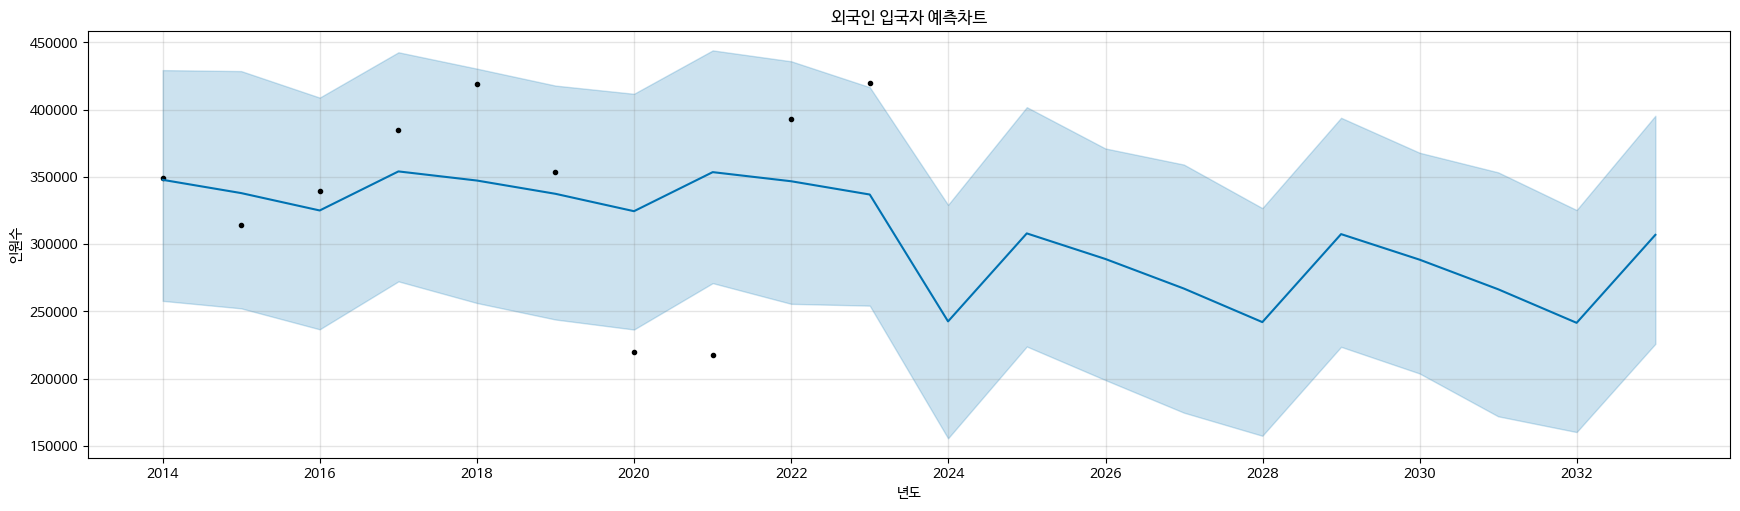

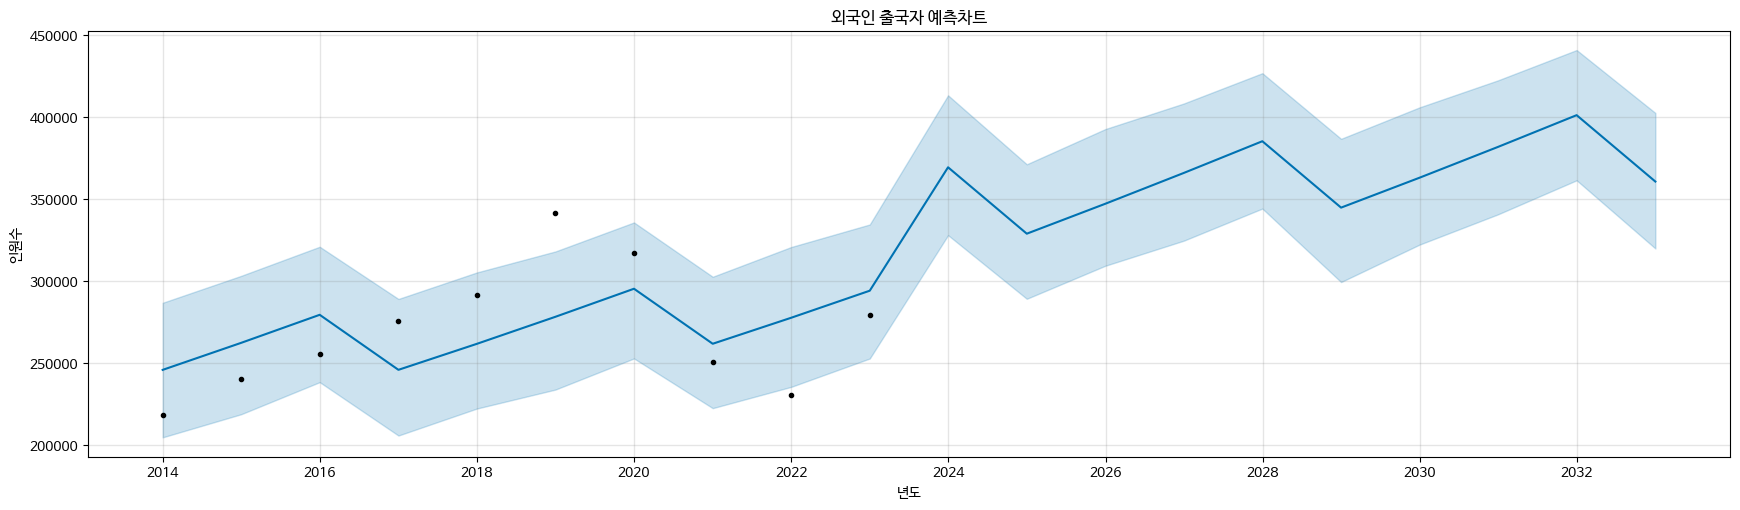

In [115]:
future = m.make_future_dataframe(periods=10, freq='YE')
forecast = m.predict(future)
fig1 = m.plot(forecast,figsize = (17.5,5) ,xlabel="년도", ylabel='인원수')
plt.title("외국인 입국자 예측차트")


future = n.make_future_dataframe(periods=10, freq='YE')
forecast = n.predict(future)
fig2 = n.plot(forecast,figsize = (17.5,5) ,xlabel="년도", ylabel='인원수')
plt.title("외국인 출국자 예측차트")


plt.show()



# 2. 부산광역시 각 구별 인구수 대비 CCTV 설치 비율 비교, 분석 시각화(2023년 6월 기준)

In [78]:
cctv_path = '/home/pkdata/data/부산광역시_방범용CCTV정보.csv'
cctv = pd.read_csv(cctv_path,encoding = "EUC-KR")
cctv['CCTV 그룹'] = cctv['CCTV 그룹'].apply(lambda x: x.split('-')[0])
cctv.head(3)


,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서


In [79]:
cctv = cctv.value_counts()
cctv = cctv.reset_index()
cctv = cctv.groupby('CCTV 그룹')['count'].sum().reset_index(name='count')
cctv.columns = ['local','count']
cctv.head(3)

,local,count
0,강서,352
1,금정,403
2,기장,344


In [80]:
popul_path = "202306_연령별인구현황_월간.csv"
popul = pd.read_csv(popul_path,encoding= "EUC-KR")
popul = popul[1:]
popul.head(3)

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
1,부산광역시 중구 (2611000000),"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423","7,849","5,068","2,388",333,16
2,부산광역시 서구 (2614000000),"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812","19,412","12,559","6,273",800,20
3,부산광역시 동구 (2617000000),"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941","15,970","10,784","5,518",640,15


In [117]:
popul_total = popul[['행정구역','2023년06월_계_총인구수']]
popul_total.columns = ['local','total']
popul_total.loc[:,'local'] = popul_total.loc[:,'local'].apply(lambda x: x.split(" ")[1])
popul_total.loc[:,'local'] = popul_total.loc[:,'local'].apply(lambda x : x.replace("구","").replace("군","").replace('부산진',"진구").strip() if len(x.strip())>2 else x)
popul_total.head(3)

,local,total
1,중구,"39,311"
2,서구,"104,449"
3,동구,"86,809"


In [82]:
total = pd.merge(cctv,popul_total, on='local')
total['total'] = total['total'].str.replace(",","").astype(int)
total = total.sort_values(by='count', ascending = False)
total.head(3)

,local,count,total
8,사하,431,300922
7,사상,422,203029
15,해운대,418,383355


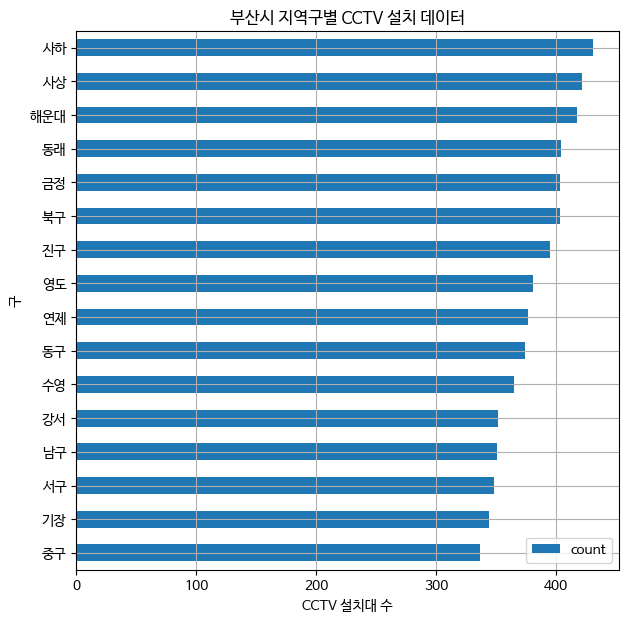

In [83]:
total.sort_values('count').plot(kind='barh', x='local', y='count', grid=True, figsize=(7,7))
plt.title('부산시 지역구별 CCTV 설치 데이터')
plt.ylabel('구')
plt.xlabel('CCTV 설치대 수')

plt.show()

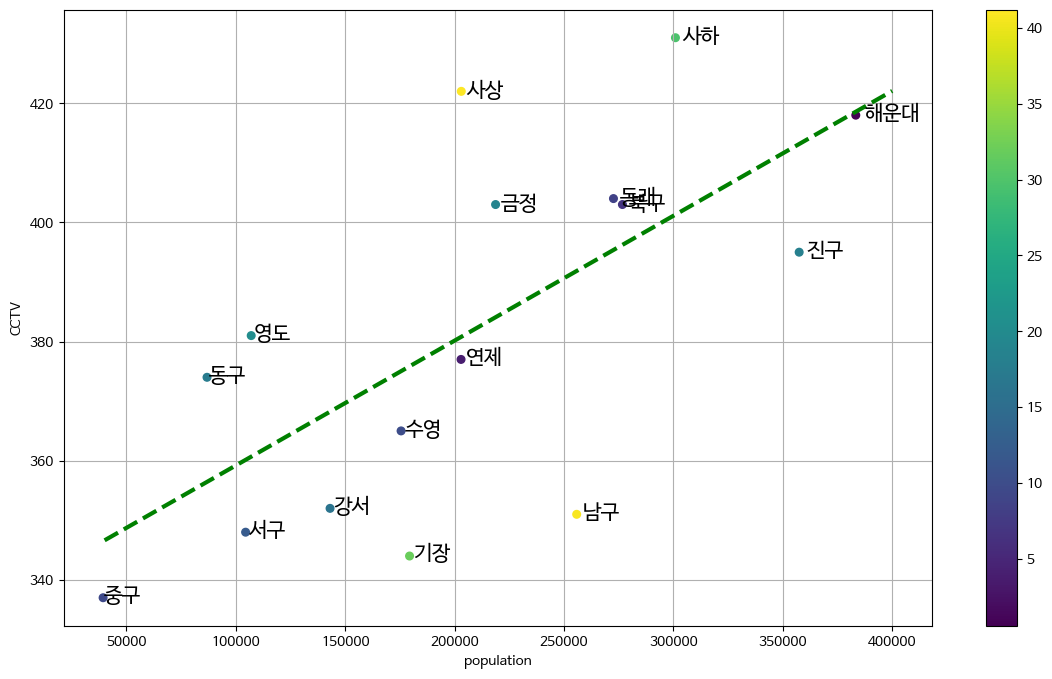

In [85]:
import numpy as np
fp1 = np.polyfit(total['total'],total['count'],1)
f1 =np.poly1d(fp1)
fx = np.linspace(40000,400000,10)

total['err'] = np.abs(total['count'] - f1(total['total']))

plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls = 'dashed', lw = 3, color ='g')
plt.scatter(total['total'],total['count'], s=30, c = total['err'])

plt.xlabel('population')
plt.ylabel('CCTV')

for i in range(len(total['local'])):
    plt.text(total.iloc[i,2]*1.01, total.iloc[i,1]*0.998, total.iloc[i,0], size=15)
    
plt.grid()
plt.colorbar()
plt.show()